# Multidimensional Scaling and the Senate

In [1]:
# File-Name:       chapter09.R
# Date:            2012-02-10                                
# Author:          Drew Conway (drew.conway@nyu.edu)
# Purpose:         Code for Chapter 4.  In this case study we introduce multidimensional scaling (MDS),
#                   a technique for visually displaying the simialrity of observations in 
#                   mutlidimensional space.  We begin with with a very simple example using simulated
#                   data.  Next, we perform the same analysis on real data, using Senate roll call vote 
#                   data.  We first must get this data into workable format, then analyze with MDS
# Data Used:       *.dta files in code/data/, source: http://www.voteview.com/dwnl.htm
# Packages Used:   foreign, ggplot2

# All source code is copyright (c) 2012, under the Simplified BSD License.  
# For more information on FreeBSD see: http://www.opensource.org/licenses/bsd-license.php

# All images and materials produced by this code are licensed under the Creative Commons 
# Attribution-Share Alike 3.0 United States License: http://creativecommons.org/licenses/by-sa/3.0/us/

# All rights reserved.

# Load libraries
library('foreign')
library('ggplot2')

### Simulated analysis to review the technique

# Some sample code to understand matrix multiplication

In [2]:
set.seed(851982) # To make sure results are consistent
ex.matrix <- matrix(sample(c(-1, 0, 1), 24, replace = TRUE),
                    nrow = 4,
                    ncol = 6)
row.names(ex.matrix) <- c('A', 'B', 'C', 'D')
colnames(ex.matrix) <- c('P1', 'P2', 'P3', 'P4', 'P5', 'P6')

In [3]:
ex.matrix

#P1 P2 P3 P4 P5 P6
#A 0 -1 0 -1 0 0
#B -1 0 1 1 1 0
#C 0 0 0 1 -1 1
#D 1 0 1 -1 0 0

# Convert matrix to customer-by-customer matrix

,P1,P2,P3,P4,P5,P6
A,0,-1,0,-1,0,0
B,-1,0,1,1,1,0
C,0,0,0,1,-1,1
D,1,0,1,-1,0,0


In [4]:
t(ex.matrix)

#A B C D
#P1 0 -1 0 1
#P2 -1 0 0 0
#P3 0 1 0 1
#P4 -1 1 1 -1
#P5 0 1 -1 0
#P6 0 0 1 0

,A,B,C,D
P1,0,-1,0,1
P2,-1,0,0,0
P3,0,1,0,1
P4,-1,1,1,-1
P5,0,1,-1,0
P6,0,0,1,0


In [5]:
# Calculate distance matrix
ex.mult <- ex.matrix %*% t(ex.matrix)
ex.mult

#A B C D
#A 2 -1 -1 1
#B -1 4 0 -1
#C -1 0 3 -1
#D 1 -1 -1 3

,A,B,C,D
A,2,-1,-1,1
B,-1,4,0,-1
C,-1,0,3,-1
D,1,-1,-1,3


In [6]:
sqrt(sum((ex.mult[1, ] - ex.mult[4, ]) ^ 2))
#[1] 2.236068

ex.dist <- dist(ex.mult)
ex.dist

#A B C
#B 6.244998
#C 5.477226 5.000000
#D 2.236068 6.782330 6.082763

[1] 2.236068

         A        B        C
B 6.244998                  
C 5.477226 5.000000         
D 2.236068 6.782330 6.082763

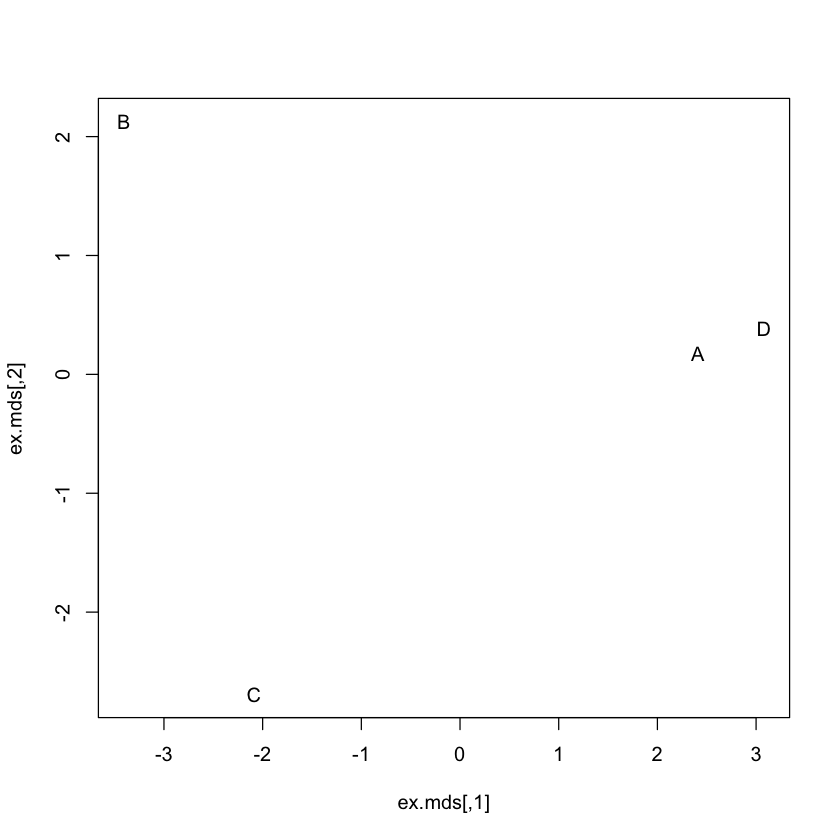

In [7]:
# Visualize clusters
ex.mds <- cmdscale(ex.dist)
plot(ex.mds, type = 'n')
text(ex.mds, c('A', 'B', 'C', 'D'))

In [8]:
library('foreign')
library('ggplot2')

data.dir <- file.path("Conway_Notebooks", "data", "roll_call")
data.files <- list.files(data.dir, pattern=".dta")

data.files

#[1] "sen101kh.dta" "sen102kh.dta"
#[3] "sen103kh.dta" "sen104kh.dta"
#[5] "sen105kh.dta" "sen106kh.dta"
#[7] "sen107kh.dta" "sen108kh_7.dta"
#[9] "sen109kh.dta" "sen110kh_2008.dta"
#[11] "sen111kh.dta"

[1] "sen102kh.dta"      "sen103kh.dta"      "sen104kh.dta"     
 [4] "sen105kh.dta"      "sen106kh.dta"      "sen107kh.dta"     
 [7] "sen108kh_7.dta"    "sen109kh.dta"      "sen110kh_2008.dta"
[10] "sen111kh.dta"      "sen112kh.dta"      "sen113kh.dta"

In [9]:
# Add all roll call vote data frames to a single list
rollcall.data <- lapply(data.files,
                        function(f)
                        {
                          read.dta(file.path(data.dir, f), convert.factors = FALSE)
                        })

In [10]:
dim(rollcall.data[[1]])
#[1] 103 647

head(rollcall.data[[1]])
#cong id state dist lstate party eh1 eh2 name V1 V2 V3 ... V638
#1 101 99908 99 0 USA 200 0 0 BUSH 1 1 1 ... 1
#2 101 14659 41 0 ALABAMA 100 0 1 SHELBY, RIC 1 1 1 ... 6
#3 101 14705 41 0 ALABAMA 100 0 1 HEFLIN, HOW 1 1 1 ... 6
#4 101 12109 81 0 ALASKA 200 0 1 STEVENS, TH 1 1 1 ... 1
#5 101 14907 81 0 ALASKA 200 0 1 MURKOWSKI, 1 1 1 ... 6
#6 101 14502 61 0 ARIZONA 100 0 1 DECONCINI, 1 1 1 ... 6

[1] 103 559

,cong,id,state,dist,lstate,party,eh1,eh2,name,V1,ellip.h,V541,V542,V543,V544,V545,V546,V547,V548,V549,V550
1,102,99908,99,0,USA,200,0,0,BUSH,6,<8b>,9,6,9,6,9,9,9,9,9,9
2,102,14705,41,0,ALABAMA,100,0,0,HEFLIN,6,<8b>,1,6,1,1,6,1,1,1,6,6
3,102,14659,41,0,ALABAMA,100,0,0,SHELBY,6,<8b>,1,6,1,6,1,6,1,6,6,6
4,102,14907,81,0,ALASKA,200,0,0,MURKOWSKI,6,<8b>,6,6,1,1,1,9,9,9,9,9
5,102,12109,81,0,ALASKA,200,0,0,STEVENS,6,<8b>,6,6,1,6,1,1,1,1,1,1
6,102,14502,61,0,ARIZONA,100,0,0,DECONCINI,1,<8b>,1,1,1,6,1,1,1,1,1,1


In [11]:
# This function takes a single data frame of roll call votes and returns a 
# Senator-by-vote matrix.
rollcall.simplified <- function(df)
{
  no.pres <- subset(df, state < 99)
  
  for(i in 10:ncol(no.pres))
  {
    no.pres[,i] <- ifelse(no.pres[,i] > 6, 0, no.pres[,i])
    no.pres[,i] <- ifelse(no.pres[,i] > 0 & no.pres[,i] < 4, 1, no.pres[,i])
    no.pres[,i] <- ifelse(no.pres[,i] > 1, -1, no.pres[,i])
  }
  
  return(as.matrix(no.pres[,10:ncol(no.pres)]))
}

rollcall.simple <- lapply(rollcall.data, rollcall.simplified)

In [12]:
# Multiply the matrix by its transpose to get Senator-to-Senator tranformation, 
# and calculate the Euclidan distance between each Senator.
rollcall.dist <- lapply(rollcall.simple, function(m) dist(m %*% t(m)))

# Do the multidimensional scaling
rollcall.mds <- lapply(rollcall.dist,
                       function(d) as.data.frame((cmdscale(d, k = 2)) * -1))

In [20]:
# Add identification information about Senators back into MDS data frames
congresses <- 102:113

for(i in 1:length(rollcall.mds))
{
  names(rollcall.mds[[i]]) <- c("x", "y")
  
  congress <- subset(rollcall.data[[i]], state < 99)
  
  congress.names <- sapply(as.character(congress$name),
                           function(n) strsplit(n, "[, ]")[[1]][1])
  
  rollcall.mds[[i]] <- transform(rollcall.mds[[i]],
                                 name = congress.names,
                                 party = as.factor(congress$party),
                                 congress = congresses[i])
}

head(rollcall.mds[[1]])

#x y name party congress
#2 -11.44068 293.0001 SHELBY 100 101
#3 283.82580 132.4369 HEFLIN 100 101
#4 885.85564 430.3451 STEVENS 200 101
#5 1714.21327 185.5262 MURKOWSKI 200 101
#6 -843.58421 220.1038 DECONCINI 100 101
#7 1594.50998 225.8166 MCCAIN 200 101

,x,y,NA.,NA..1,NA..2,name,party,congress
2,13.63947,318.0718,HEFLIN,100,101,HEFLIN,100,102
3,142.4457,354.3245,SHELBY,100,101,SHELBY,100,102
4,1711.213,301.3357,MURKOWSKI,200,101,MURKOWSKI,200,102
5,1419.277,357.0446,STEVENS,200,101,STEVENS,200,102
6,-889.714,23.77178,DECONCINI,100,101,DECONCINI,100,102
7,1731.366,158.597,MCCAIN,200,101,MCCAIN,200,102


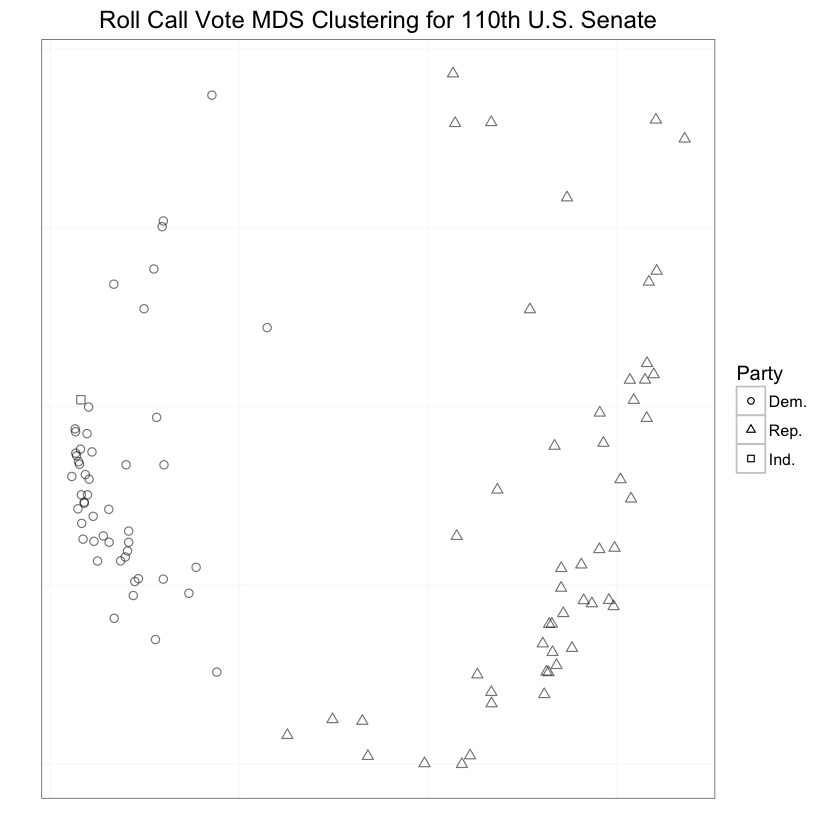

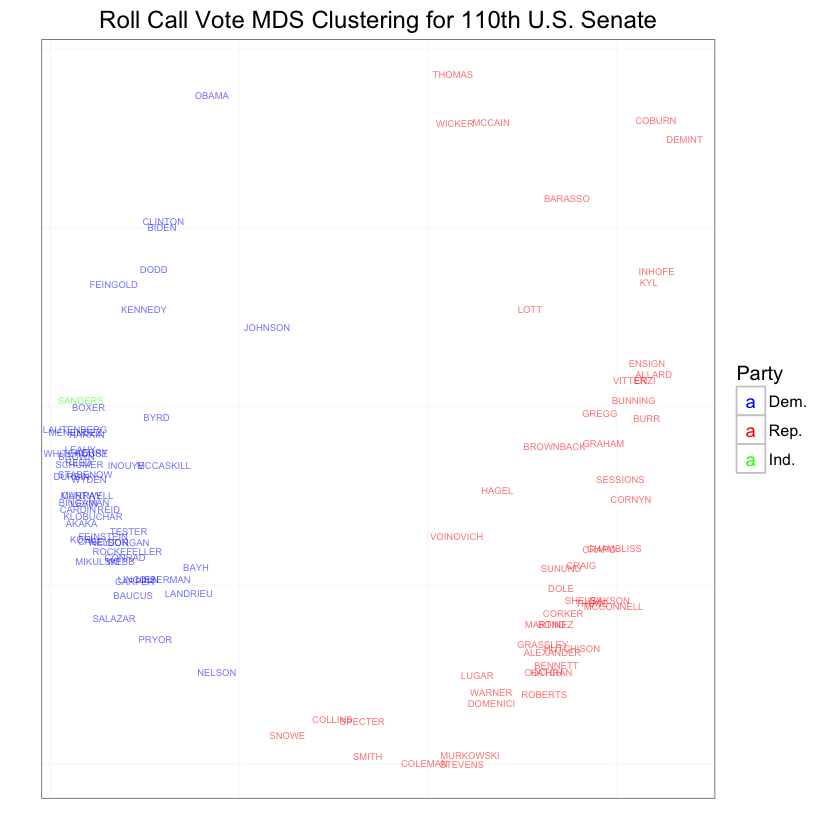

In [21]:
# Create a plot of just the 110th Congress
cong.110 <- rollcall.mds[[9]]

base.110 <- ggplot(cong.110, aes(x = x, y = y)) +
  scale_size(range = c(2,2), guide = 'none') +
  scale_alpha(guide = 'none') +
  theme_bw() +
  theme(axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        panel.grid.major = element_blank()) +
  ggtitle("Roll Call Vote MDS Clustering for 110th U.S. Senate") +
  xlab("") +
  ylab("") +
  scale_shape(name = "Party", breaks = c("100", "200", "328"),
              labels = c("Dem.", "Rep.", "Ind."), solid = FALSE) +
  scale_color_manual(name = "Party", values = c("100" = "blue",
                                                "200" = "red",
                                                "328" = "green"),
                     breaks = c("100", "200", "328"),
                     labels = c("Dem.", "Rep.", "Ind."))

print(base.110 + geom_point(aes(shape = party,
                                alpha = 0.75,
                                size = 2)))
print(base.110 + geom_text(aes(color = party,
                               alpha = 0.75,
                               label = cong.110$name,
                               size = 2)))

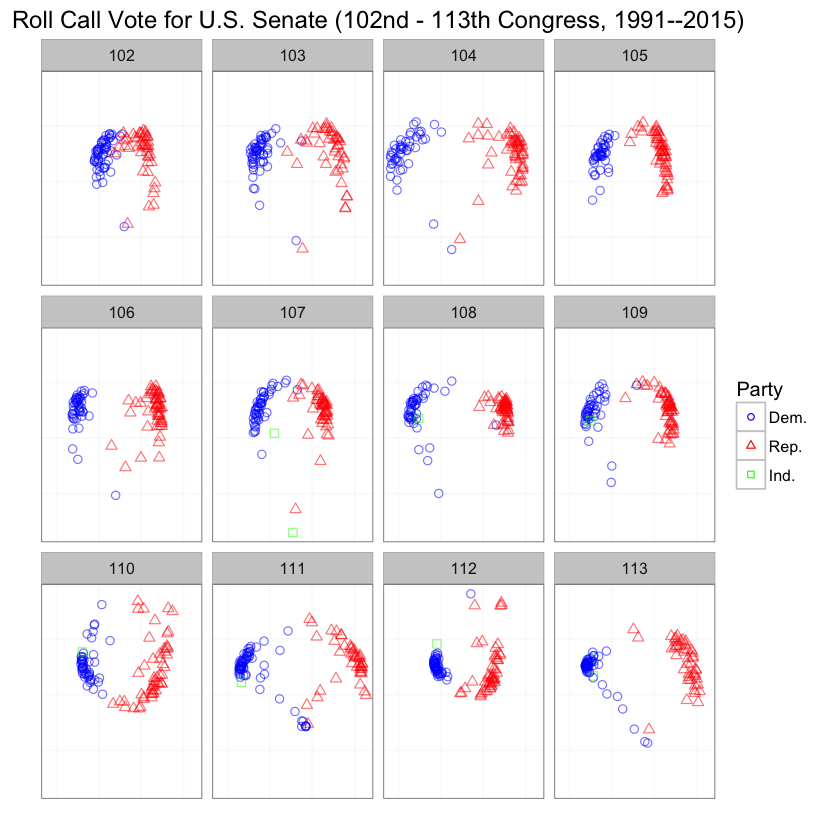

In [28]:
# Create a single visualization of MDS for all Congresses on a grid
all.mds <- do.call(rbind, rollcall.mds)
all.plot <- ggplot(all.mds, aes(x = x, y = y)) +
  geom_point(aes(shape = party, color = party, alpha = 0.75, size = 2)) +
  scale_size(range = c(2, 2), guide = 'none') +
  scale_alpha(guide = 'none') +
  theme_bw() +
  theme(axis.ticks = element_blank(),
        axis.text.x = element_blank(),
        axis.text.y = element_blank(),
        panel.grid.major = element_blank()) +
  ggtitle("Roll Call Vote for U.S. Senate (102nd - 113th Congress, 1991--2015)") +
       xlab("") +
       ylab("") +
       scale_shape(name = "Party",
                   breaks = c("100", "200", "328"),
                   labels = c("Dem.", "Rep.", "Ind."),
                   solid = FALSE) +
       scale_color_manual(name = "Party",
                   values = c("100" = "blue",
                              "200" = "red",
                              "328" = "green"),
                   breaks = c("100", "200", "328"),
                   labels = c("Dem.", "Rep.", "Ind.")) +
      facet_wrap(~ congress)

print(all.plot)

In [31]:
# This is the code omitted from the chapter.  This is used to create shnazy plots of everything!
if (FALSE) {

for(i in 1:length(rollcall.mds))
{
  mds <- rollcall.mds[[i]]
  congress <- congresses[i]
  plot.title <- paste("Roll Call Vote MDS Clustering for ",
                      congress,
                      " U.S. Senate",
                      sep = "")

  # Build base plot
  mds.plot <- ggplot(mds, aes(x = x, y = y)) +
    scale_size(range = c(2, 2), guide = 'none') +
    scale_alpha(guide = 'none') +
    theme_bw() +
    theme(axis.ticks = element_blank(), 
          axis.text.x = element_blank(),
          axis.text.y = element_blank(),
          panel.grid.major = element_blank()) +
    ggtitle(plot.title) +
    xlab("") +
    ylab("")
  

  # Build up point and text plots separately
  mds.point <- mds.plot + geom_point(aes(shape = party,
                                         alpha = 0.75,
                                         size = 2))
  mds.text <- mds.plot + geom_text(aes(color = party,
                                       alpha = 0.75,
                                       label = mds$name,
                                       size = 2))
  

  # Fix labels, shapes and colors
  if(length(levels(mds$party)) > 2)
  {
    mds.point <- mds.point + scale_shape(name = "Party",
                                         breaks = c("100", "200", "328"),
                                         labels = c("Dem.", "Rep.", "Ind."),
                                         solid = FALSE)
    mds.text <- mds.text + scale_color_manual(name = "Party",
                                              values = c("100" = "blue",
                                                         "200" = "red",
                                                         "328" = "green"),
                                              breaks = c("100", "200", "328"),
                                              labels = c("Dem.", "Rep.", "Ind."))
  } else {
    mds.point <- mds.point + scale_shape(name = "Party",
                                         breaks = c("100", "200"),
                                         labels = c("Dem.", "Rep."),
                                         solid = FALSE)
    mds.text <- mds.text + scale_color_manual(name = "Party",
                                              values = c("100" = "blue",
                                                         "200" = "red"),
                                              breaks = c("100", "200"),
                                              labels = c("Dem.", "Rep."))
  }
if (FALSE) {
  ggsave(plot = mds.point,
         filename = file.path('images',
                              'senate_plots',
                              paste(congress, "_point.pdf", sep = "")),
         width = 8,
         height = 5)
} else {
   print(mds.point)
}
    
if (FALSE) {
  ggsave(plot = mds.text,
         filename = file.path('images',
                              'senate_plots',
                              paste(congress, "_names.pdf", sep = "")),
         width = 8,
         height = 5)
} else {
  print(mds.text)
}

}
    
}